In [1]:
## VH PDF distributions

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [2]:
from matplotlib import rc
rc('font', **{'size':30})
#rc('text', usetex=True)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:
from dask.distributed import Client

client=Client(local_directory = '/scratch/e14/qo9901/') 
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41551 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41551/status,
Dashboard: /proxy/41551/status,Workers: 4
Total threads: 4,Total memory: 150.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41533,Workers: 4
Dashboard: /proxy/41551/status,Total threads: 4
Started: Just now,Total memory: 150.00 GiB
Comm: tcp://127.0.0.1:42709,Total threads: 1
Dashboard: /proxy/34785/status,Memory: 37.50 GiB
Nanny: tcp://127.0.0.1:34043,


In [5]:
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01'


In [6]:
from matplotlib import ticker, cm

In [7]:
import cmocean

In [8]:
import dask
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [9]:
intrusions_arr_narrow = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+01_intrusion.nc').vh.sel(Time = slice(30,80))
intrusions_arr_wide = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_intrusion.nc').vh.sel(Time = slice(51,101))

In [11]:

delta  = 2.5e4/1e6
bins_wide = np.arange(-2, 2 + delta, delta)

#narrow

delta  = 2.5e3/1e6
#bins = np.arange(-0.8 *10**6, 0.8 *10**6 + delta, delta)
bins = np.arange(-10**5, 10**5 + delta, delta)
#bins = np.arange(-10**6, 10**6 + delta, delta)
bins_narrow = np.arange(-0.2, 0.2 + delta, delta) #(narrow Steep)


In [12]:
import gc
client.run(gc.collect)

{'tcp://127.0.0.1:41877': 52,
 'tcp://127.0.0.1:42709': 52,
 'tcp://127.0.0.1:43263': 52,
 'tcp://127.0.0.1:46337': 52}

https://en.wikipedia.org/wiki/Skewness

In [14]:
from scipy.stats import skew

In [ ]:
plt.figure(figsize = (12,8)) #yq = 150 on SILL latitude
test = intrusions_arr/1e6

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)

#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, bins = bins, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
'''    
plt.plot(np.ones(10)*np.mean(test).values,np.logspace(0,4,10), label = 'Mean')    
plt.plot(np.ones(10)*(test.where(test<0, drop = True)).mean().values,np.logspace(0,4,10), label = 'Mean for southward transport')    
plt.legend()   
'''   
#plt.ylim([0,10**4])
#plt.ylim([0,200])
plt.xscale('log')
plt.xlabel('Number of occurrences')
plt.xlim([0,10**4])
#plt.xticks([0, 1,2,3])
plt.ylabel('CDW meridional \n transport (Sv)')
plt.title('Skewness = %.2f' % skew(test))
#plt.savefig(outfolder + '/V_skewness_horizontal.pdf' )

/jobfs/98215971.gadi-pbs/ipykernel_1356537/3092422225.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim([0,10**4])
/jobfs/98215971.gadi-pbs/ipykernel_1356537/3092422225.py:76: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax4.set_xlim([0,10**4])


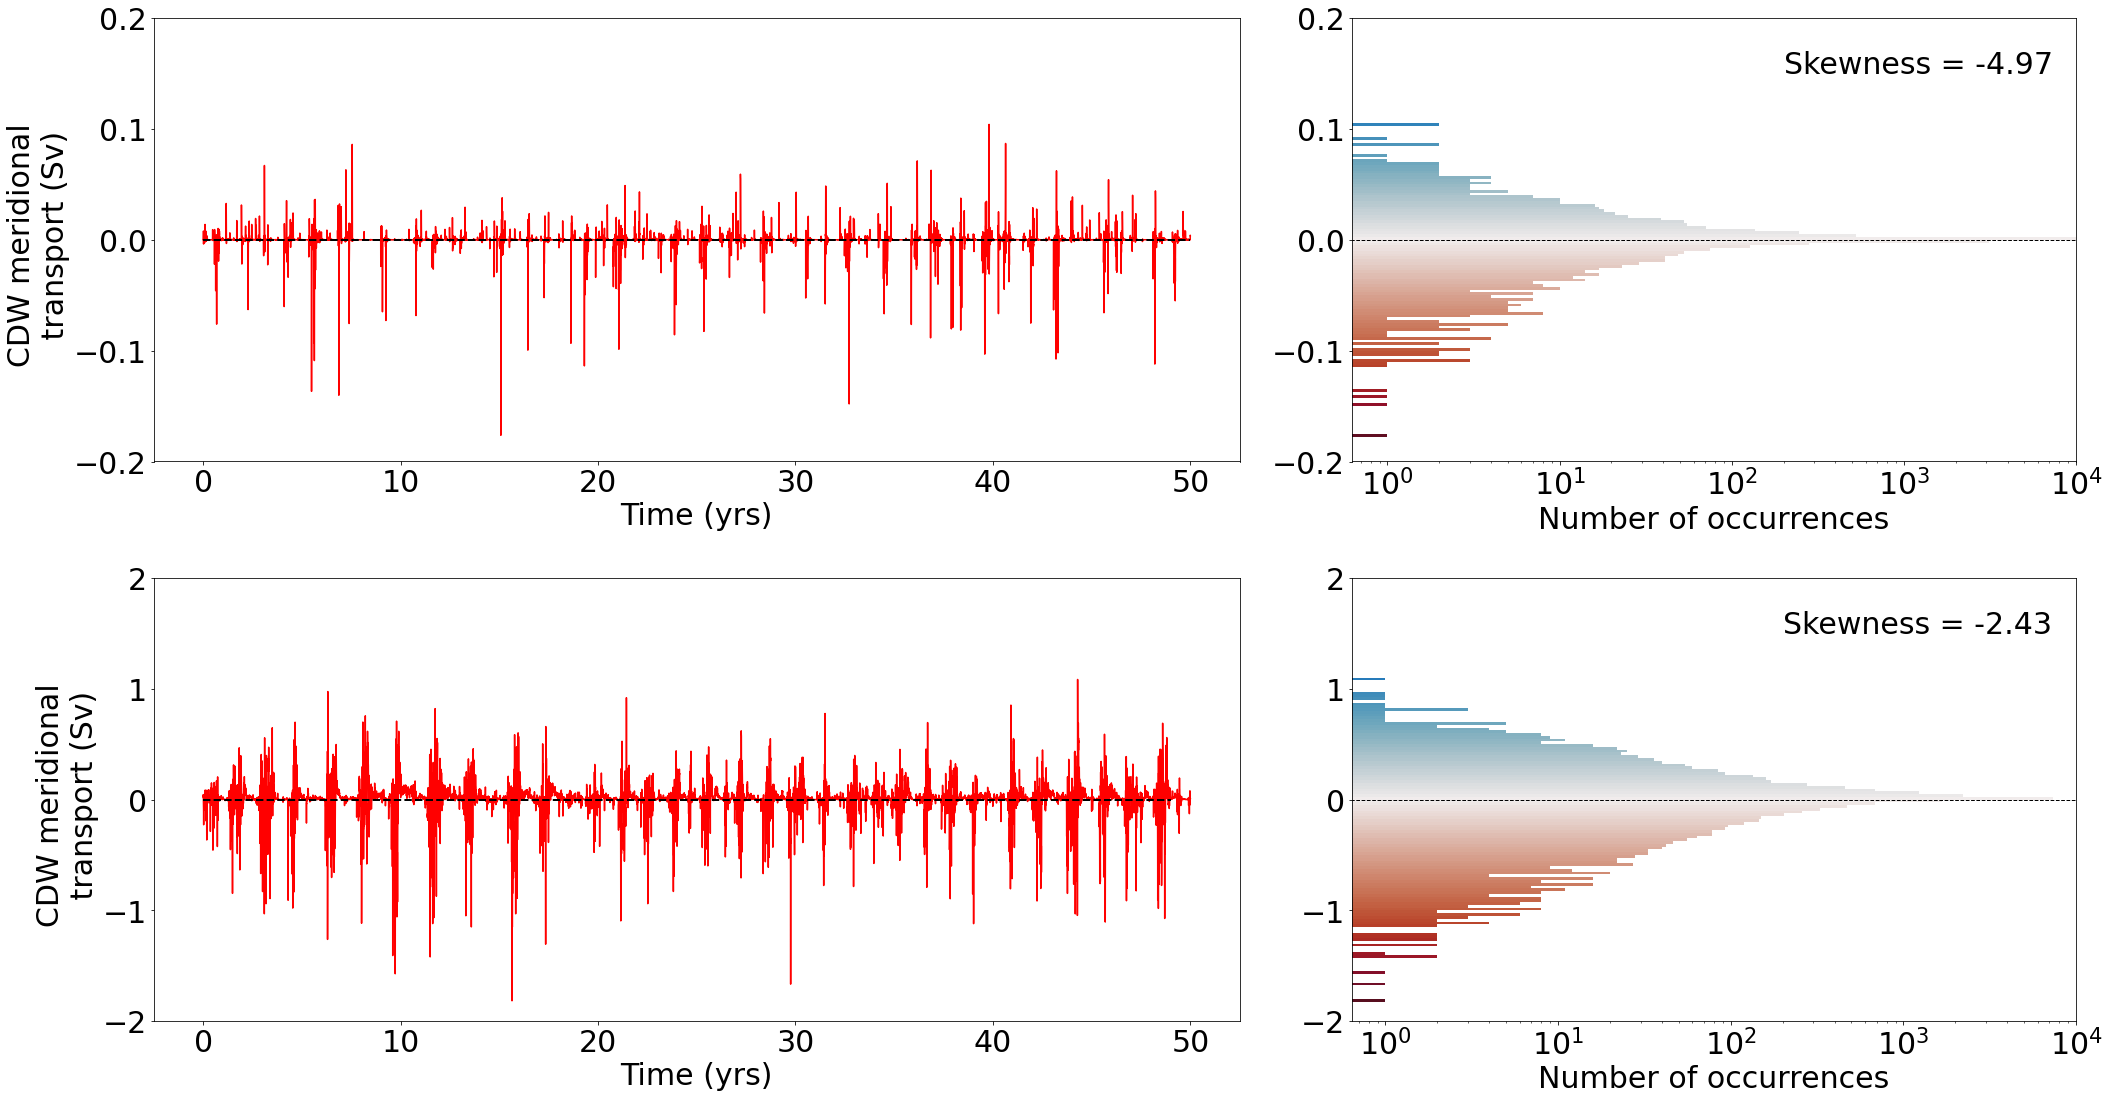

In [27]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2,2, gridspec_kw={'width_ratios':[3, 2]}, figsize = (30,16))#, sharey = 'row')

 # narrow canyon
(intrusions_arr_narrow/1e6).plot(ax = ax1, label = 'total',color = 'r')
ax1.set_xticks(np.arange(30,86,10))
ax1.set_xticklabels([0,10,20,30,40,50])
ax1.set_ylim([-0.2,0.2])
ax1.set_title('')
ax1.set_xlabel('Time (yrs)')
ax1.set_ylabel('CDW meridional \n transport (Sv)')
#plt.ylim([-235000,135000]) # for narrow STEEP 
ax1.plot(np.arange(30,81,1), np.zeros(len(np.arange(30,81,1))), linestyle = 'dashed', color = 'k', lw = 2)


test = intrusions_arr_narrow/1e6
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)
#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, ax = ax2, bins = bins_narrow, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
#CHANGE FOR WIDE VS NARROW
ax2.set_ylim([-0.2,0.2]) 
#ax4.set_yticklabels([])
ax2.set_xscale('log')
ax2.set_xlabel('Number of occurrences')
ax2.set_xlim([0,10**4])
ax2.plot(np.arange(0,10**4,10),np.zeros(len(np.arange(0,10**4,10))), linestyle = 'dashed', color = 'k', lw = 1)
         

#CHANGE LOCATION OF SKEWNESS TEXT FOR WIDE()1.5 VS NARROW (0.15)
ax2.text(2*10**2, 0.15, 'Skewness = %.2f' % skew(test), fontsize=30) #, bbox=dict(facecolor='red', alpha=0.5)
ax2.set_title('')


 # wide canyon, comment out for narrow
(intrusions_arr_wide/1e6).plot(ax = ax3, label = 'total',color = 'r')
ax3.set_xticks(np.arange(51,106,10))
ax3.set_xticklabels([0,10,20,30,40,50])
ax3.set_ylim([-2,2])

ax3.set_title('')
ax3.set_xlabel('Time (yrs)')
ax3.set_ylabel('CDW meridional \n transport (Sv)')
#plt.ylim([-235000,135000]) # for narrow STEEP 
ax3.plot(np.arange(51,101,1), np.zeros(len(np.arange(51,101,1))), linestyle = 'dashed', color = 'k', lw = 2)


test = intrusions_arr_wide/1e6
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)
#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, ax = ax4, bins = bins_wide, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
ax4.set_ylim([-2,2]) 
#ax2.set_yticklabels([])
ax4.set_xscale('log')
ax4.set_xlabel('Number of occurrences')
ax4.set_xlim([0,10**4])
ax4.plot(np.arange(0,10**4,10),np.zeros(len(np.arange(0,10**4,10))), linestyle = 'dashed', color = 'k', lw = 1)

#CHANGE LOCATION OF SKEWNESS TEXT FOR WIDE()1.5 VS NARROW (0.15)
ax4.text(2*10**2, 0.15*10, 'Skewness = %.2f' % skew(test), fontsize=30) #, bbox=dict(facecolor='red', alpha=0.5)
ax4.set_title('')

plt.tight_layout()
#plt.savefig(outfolder + '/V_combined.png', dpi = 600)
plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/V_combined_all_yaxis.png', dpi =600)

/jobfs/98215971.gadi-pbs/ipykernel_1356537/3933531049.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([0,10**4])
/jobfs/98215971.gadi-pbs/ipykernel_1356537/3933531049.py:46: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([0,10**4])


Text(0.5, 1.0, '')

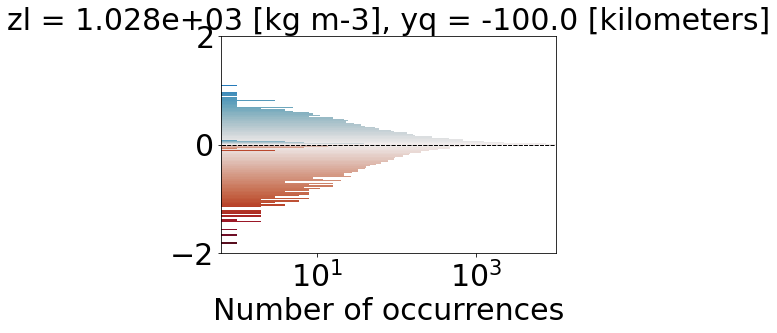

In [34]:
fig, ax = plt.subplots()

test = intrusions_arr_wide/1e6
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)
#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, ax = ax, bins = bins_wide, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
ax.set_ylim([-2,2]) 
#ax2.set_yticklabels([])
ax.set_xscale('log')
ax.set_xlabel('Number of occurrences')
ax.set_xlim([0,10**4])
ax.plot(np.arange(0,10**4,10),np.zeros(len(np.arange(0,10**4,10))), linestyle = 'dashed', color = 'k', lw = 1)


test = intrusions_arr_narrow/1e6
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)
#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, ax = ax, bins = bins_narrow, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
#CHANGE FOR WIDE VS NARROW
#ax.set_ylim([-0.2,0.2]) 
#ax4.set_yticklabels([])
ax.set_xscale('log')
ax.set_xlabel('Number of occurrences')
ax.set_xlim([0,10**4])
ax.plot(np.arange(0,10**4,10),np.zeros(len(np.arange(0,10**4,10))), linestyle = 'dashed', color = 'k', lw = 1)
         

#CHANGE LOCATION OF SKEWNESS TEXT FOR WIDE()1.5 VS NARROW (0.15)
ax2.text(2*10**2, 0.15, 'Skewness = %.2f' % skew(test), fontsize=30) #, bbox=dict(facecolor='red', alpha=0.5)
ax2.set_title('')



/jobfs/78636474.gadi-pbs/ipykernel_2884810/1437691312.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim([0,10**4])


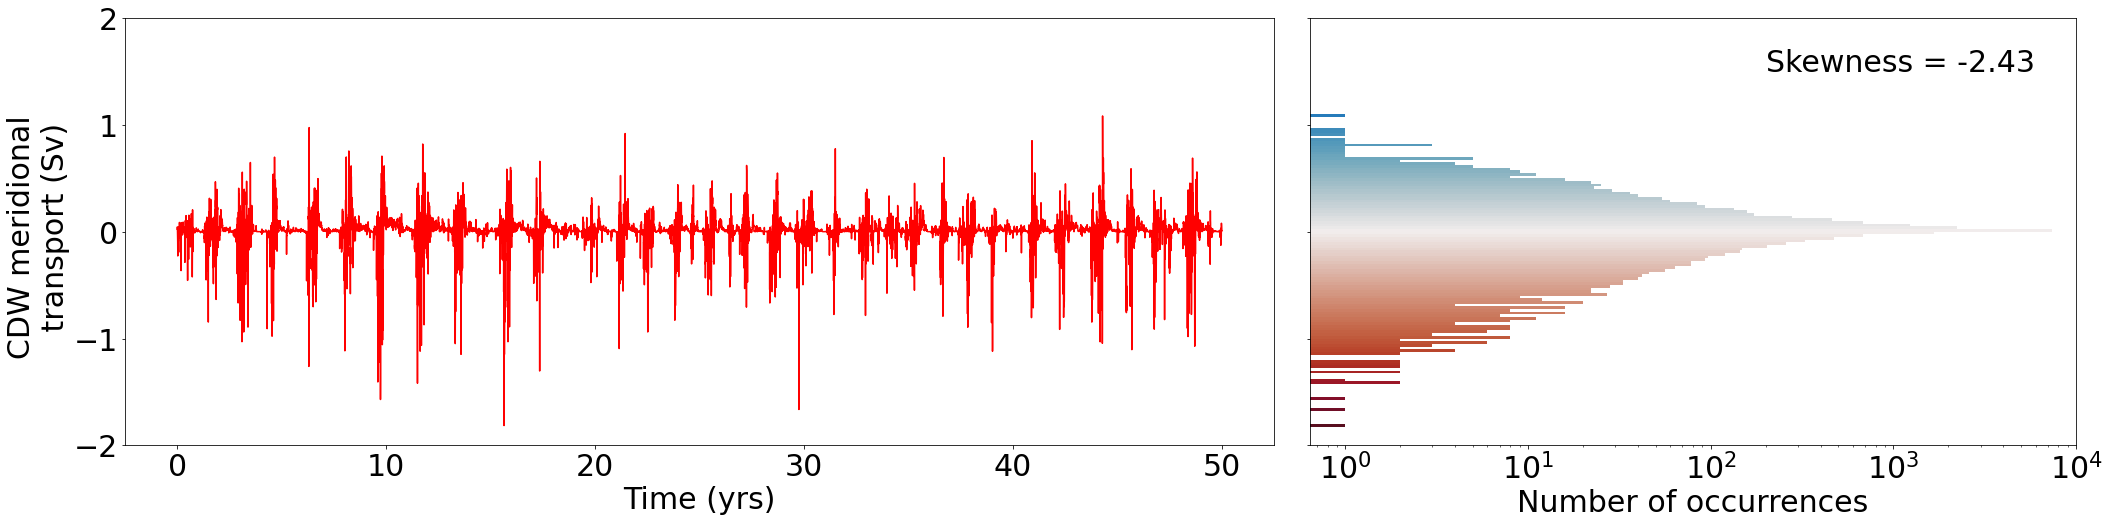

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[3, 2]}, figsize = (30,8), sharey = 'col')
(intrusions_arr/1e6).plot(ax = ax1, label = 'total',color = 'r')

 # wide canyon, comment out for narrow
ax1.set_xticks(np.arange(51,106,10))
ax1.set_xticklabels([0,10,20,30,40,50])
ax1.set_ylim([-2,2])


#Narrow canyon below
#ax1.set_xticklabels([0,0,10,20,30,40,50])
#ax1.set_ylim([-0.2,0.2])


ax1.set_title('')
ax1.set_xlabel('Time (yrs)')
ax1.set_ylabel('CDW meridional \n transport (Sv)')
#plt.ylim([-235000,135000]) # for narrow STEEP 


test = intrusions_arr/1e6
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap(cmocean.cm.balance_r)
#plot histogram
kwargs  =  {'orientation': 'horizontal'}
n, bins, patches = xr.plot.hist(test, ax = ax2, bins = bins, orientation = 'horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
#CHANGE FOR WIDE VS NARROW
ax2.set_ylim([-2,2]) 

ax2.set_yticklabels([])
ax2.set_xscale('log')
ax2.set_xlabel('Number of occurrences')
ax2.set_xlim([0,10**4])

#CHANGE LOCATION OF SKEWNESS TEXT FOR WIDE()1.5 VS NARROW (0.15)
ax2.text(2*10**2, 0.15*10, 'Skewness = %.2f' % skew(test), fontsize=30) #, bbox=dict(facecolor='red', alpha=0.5)
ax2.set_title('')

plt.tight_layout()
#plt.savefig(outfolder + '/V_combined.png', dpi = 600)
#plt.savefig(outfolder + '/V_combined.pdf')